In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import keras as k
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import os

Using TensorFlow backend.


In [39]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [82]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


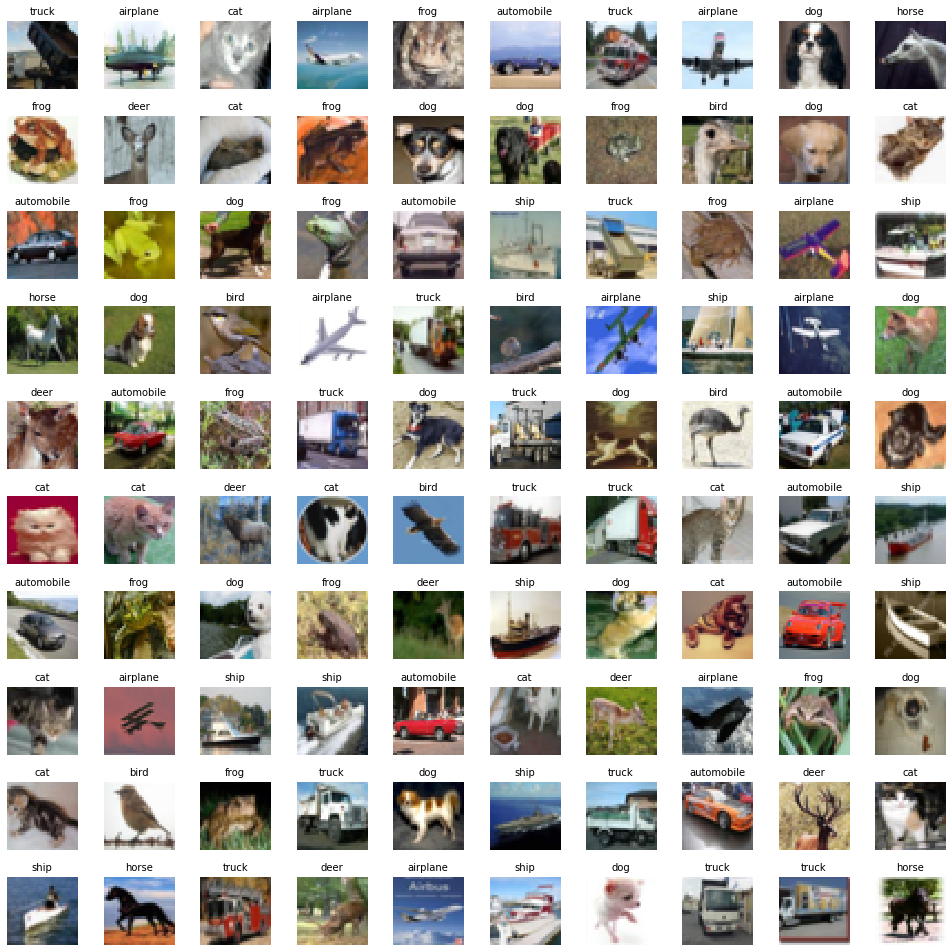

In [4]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 10)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [79]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f'shape of X train : {X_train.shape}')
print(f'shape of X test : {X_test.shape}')

shape of X train : (50000, 32, 32, 3)
shape of X test : (10000, 32, 32, 3)


In [80]:
y_testo = y_test
print(f'shape of Y testo : {y_testo.shape}')

shape of Y testo : (10000, 1)


In [81]:
y_cat_train = to_categorical(y_train, num_classes = 10)
y_cat_test = to_categorical(y_test, num_classes = 10)
print(f'shape of Y train : {y_cat_train.shape}')
print(f'shape of Y test : {y_cat_test.shape}')
print(f'shape of Y testo : {y_testo.shape}')


shape of Y train : (50000, 10)
shape of Y test : (10000, 10)
shape of Y testo : (10000, 1)


In [31]:
model = Sequential()
batch_size = 64
num_classes = 10
epochs = 10

model.add(Conv2D(32, kernel_size=5, activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(64, 5, activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Conv2D(128, 5, activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 4, 4, 128)        

In [20]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, 
                            height_shift_range = 0.1)

datagen.fit(X_train)

In [22]:
model.fit(X_train, y_cat_train, batch_size=batch_size, epochs=10,validation_data = (X_test, y_cat_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 97s 2ms/step - loss: 1.6430 - accuracy: 0.3951 - val_loss: 1.3061 - val_accuracy: 0.5296
Epoch 2/10
50000/50000 [==============================] - 96s 2ms/step - loss: 1.2952 - accuracy: 0.5388 - val_loss: 1.1326 - val_accuracy: 0.5959
Epoch 3/10
50000/50000 [==============================] - 96s 2ms/step - loss: 1.1492 - accuracy: 0.5919 - val_loss: 1.0268 - val_accuracy: 0.6399
Epoch 4/10
50000/50000 [==============================] - 96s 2ms/step - loss: 1.0410 - accuracy: 0.6358 - val_loss: 0.9945 - val_accuracy: 0.6512
Epoch 5/10
50000/50000 [==============================] - 96s 2ms/step - loss: 0.9649 - accuracy: 0.6620 - val_loss: 0.9323 - val_accuracy: 0.6754
Epoch 6/10
50000/50000 [==============================] - 97s 2ms/step - loss: 0.9108 - accuracy: 0.6824 - val_loss: 0.8814 - val_accuracy: 0.7035
Epoch 7/10
50000/50000 [==============================] - 97s 2ms/st

In [23]:
model_history = pd.DataFrame(model.history.history)
model_history

,val_loss,val_accuracy,loss,accuracy
0,1.306140,0.5296,1.643045,0.39514
1,1.132590,0.5959,1.295239,0.53878
2,1.026778,0.6399,1.149160,0.59188
3,0.994481,0.6512,1.041008,0.63578
4,0.932268,0.6754,0.964867,0.66204
5,0.881406,0.7035,0.910764,0.68244
6,0.847050,0.7069,0.865901,0.69762
7,0.851523,0.7043,0.828923,0.70880
8,0.801621,0.7226,0.791189,0.72210
9,0.793180,0.7298,0.769671,0.73150


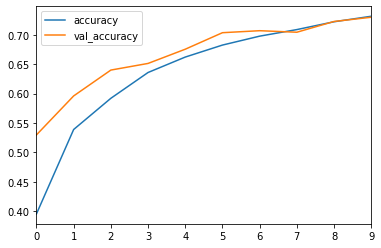

In [24]:
model_history[['accuracy','val_accuracy']].plot()

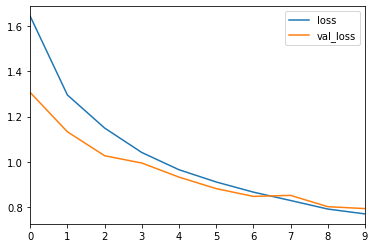

In [33]:
model_history[['loss','val_loss']].plot()

In [63]:
predict_class = model.predict_classes(X_test)
predict_class.shape

(10000,)

In [83]:
y_testo.shape

(10000, 1)

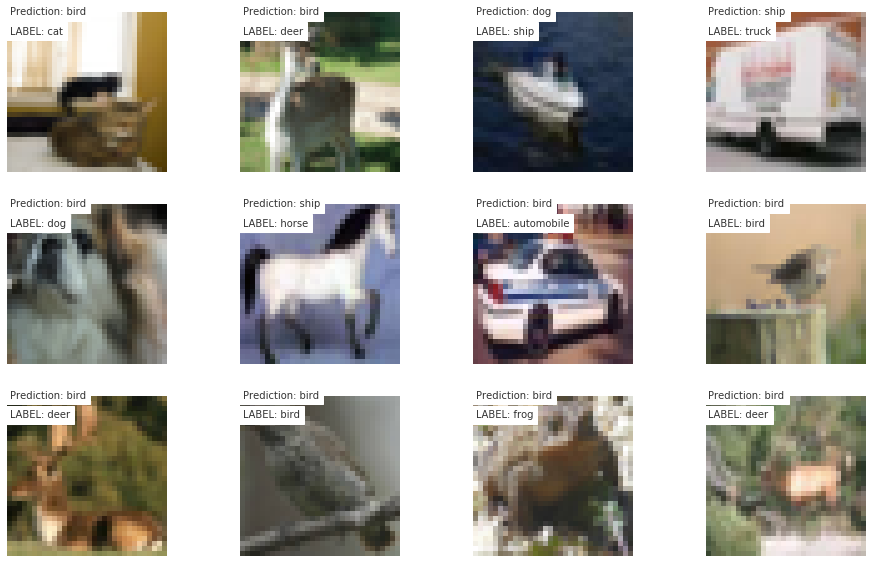

In [85]:
name = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

R = 3
C = 4
fig, axes = plt.subplots(R,C, figsize=(16,10))

for i in range(R):
    for j in range(C):
        r = np.random.randint(10000, size=1)[0]
        axes[i, j].imshow(X_test[r].reshape(32,32,3))
        axes[i, j].plot()
        #print('this is a', name[y_testo[r][0]], '-------- prediction is:', name[predicto[r]])
        axes[i, j].text(0, 0, 'Prediction: %s' % name[int(predict_class[r])], color='k', backgroundcolor='w', alpha=0.8)
        axes[i, j].text(0, 3.9, 'LABEL: %s' % name[int(y_testo[r])], color='k', backgroundcolor='w', alpha=0.8)
        axes[i, j].axis('off')
        